In [105]:
#loading relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install bioinfokit
from bioinfokit.visuz import cluster


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
#load the McDonald's dataset
mcdonalds=pd.read_csv("/content/mcdonalds.csv")
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [107]:
#view number of rows and columns
mcdonalds.shape

(1453, 15)

In [108]:
#view the last five rows of the dataset
print(mcdonalds.tail())

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  
1448      No        Yes  I hate it!-5   47         Once a year    Male  
1449     Yes         No            +2   36         Once a week  Female  
1450      No         No            +3   52        Once a month  Female  
1451     Yes         No            +4   41  Every three months    Male  
1452      No        Yes            -3   30  Every three months    Male  


##**Exploring the dataset:**
###Customer segmentation - based on socio-demographs (Age & Gender):

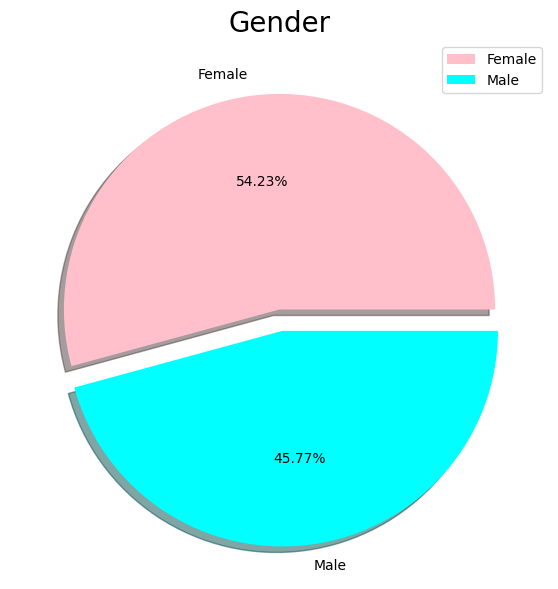

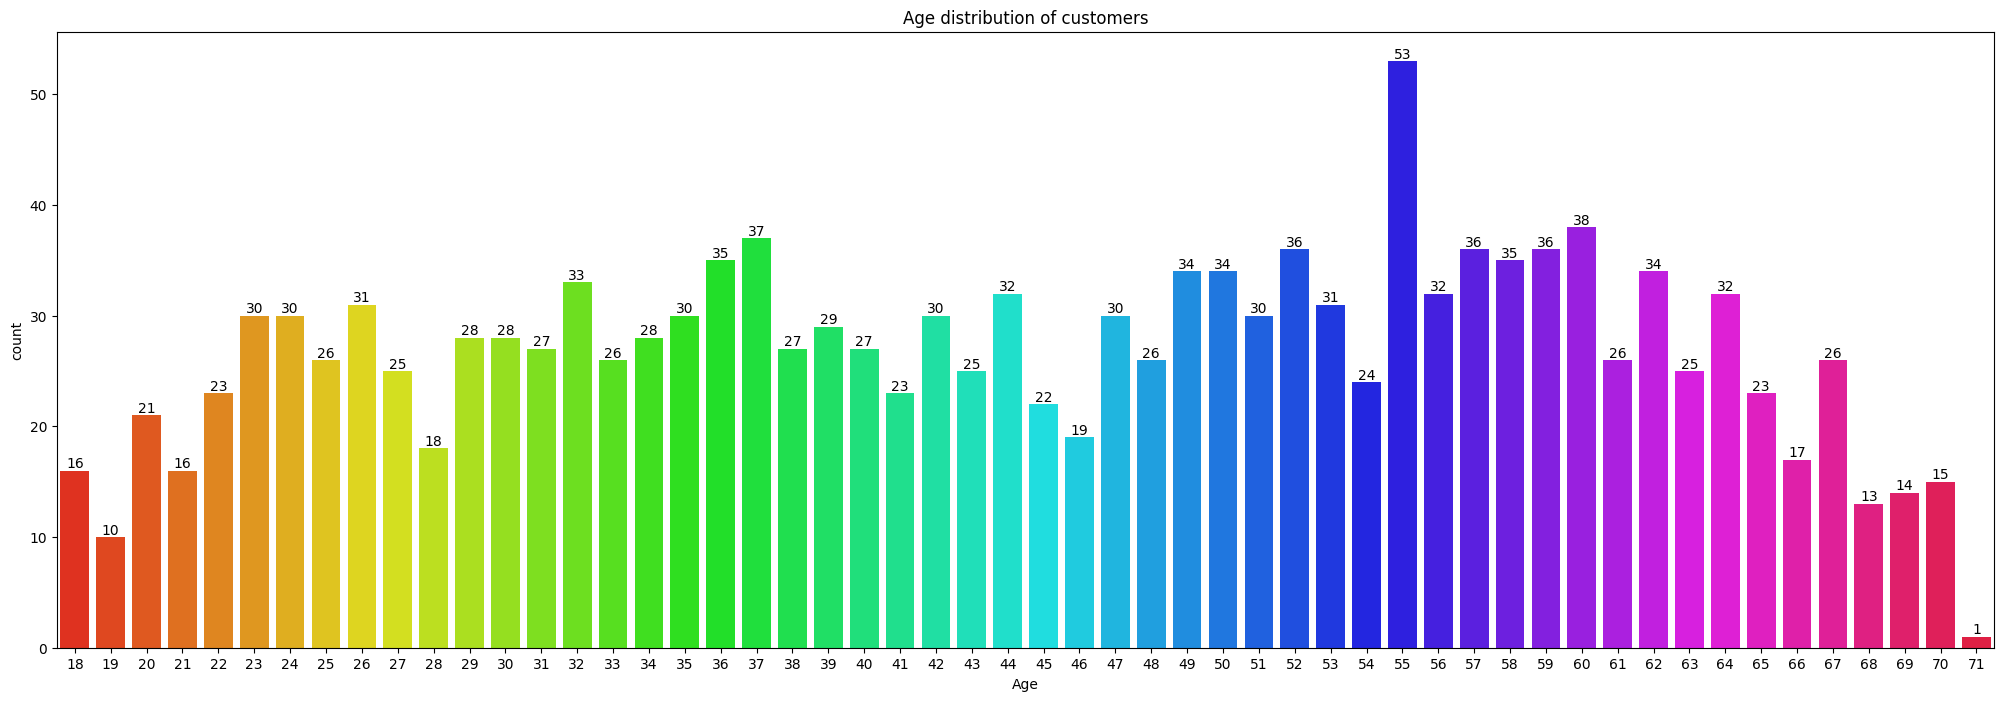

In [109]:
#Gender
labels = ['Female', 'Male']
size = mcdonalds['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=mcdonalds['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()


In [110]:
#View mean of the characteristic taste related columns
MD_x =mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
column_names = mcdonalds.columns[0:11]
for name, mean in zip(column_names, col_means):
    print(name, mean)

yummy 0.55
convenient 0.91
spicy 0.09
fattening 0.87
greasy 0.53
fast 0.9
cheap 0.6
tasty 0.64
expensive 0.36
healthy 0.2
disgusting 0.24


#Catplot between age and like to find their relation:

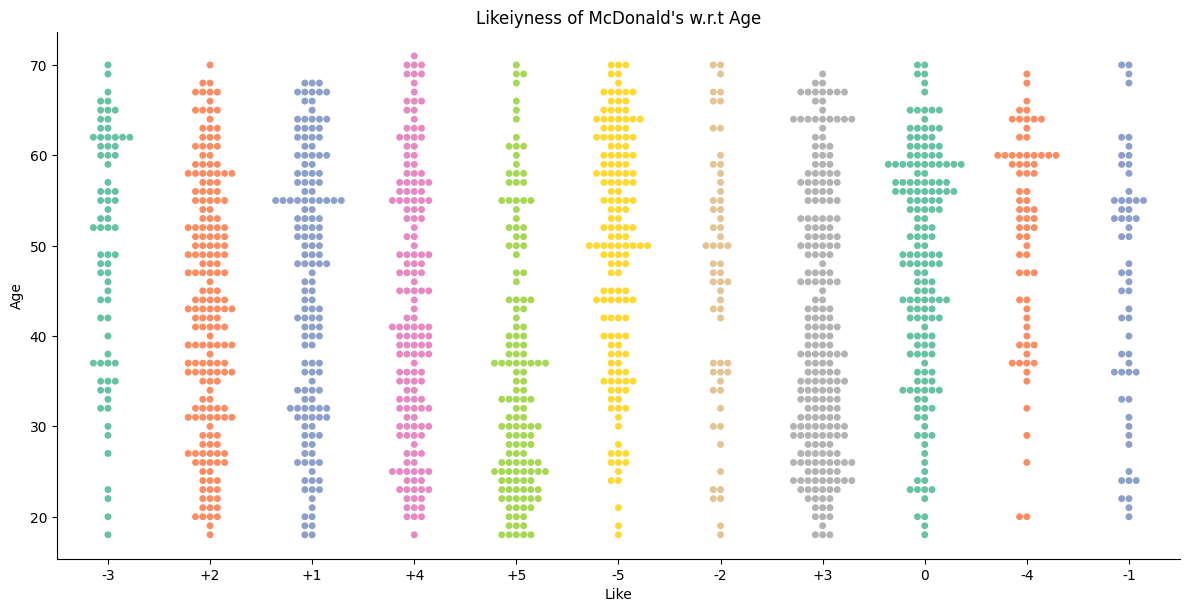

In [111]:
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=mcdonalds,
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likeiyness of McDonald\'s w.r.t Age')
plt.show()

In [112]:
#Label encoding for Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    mcdonalds[x] = LabelEncoder().fit_transform(mcdonalds[x])
    return mcdonalds

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


#Histogram of the attributes:

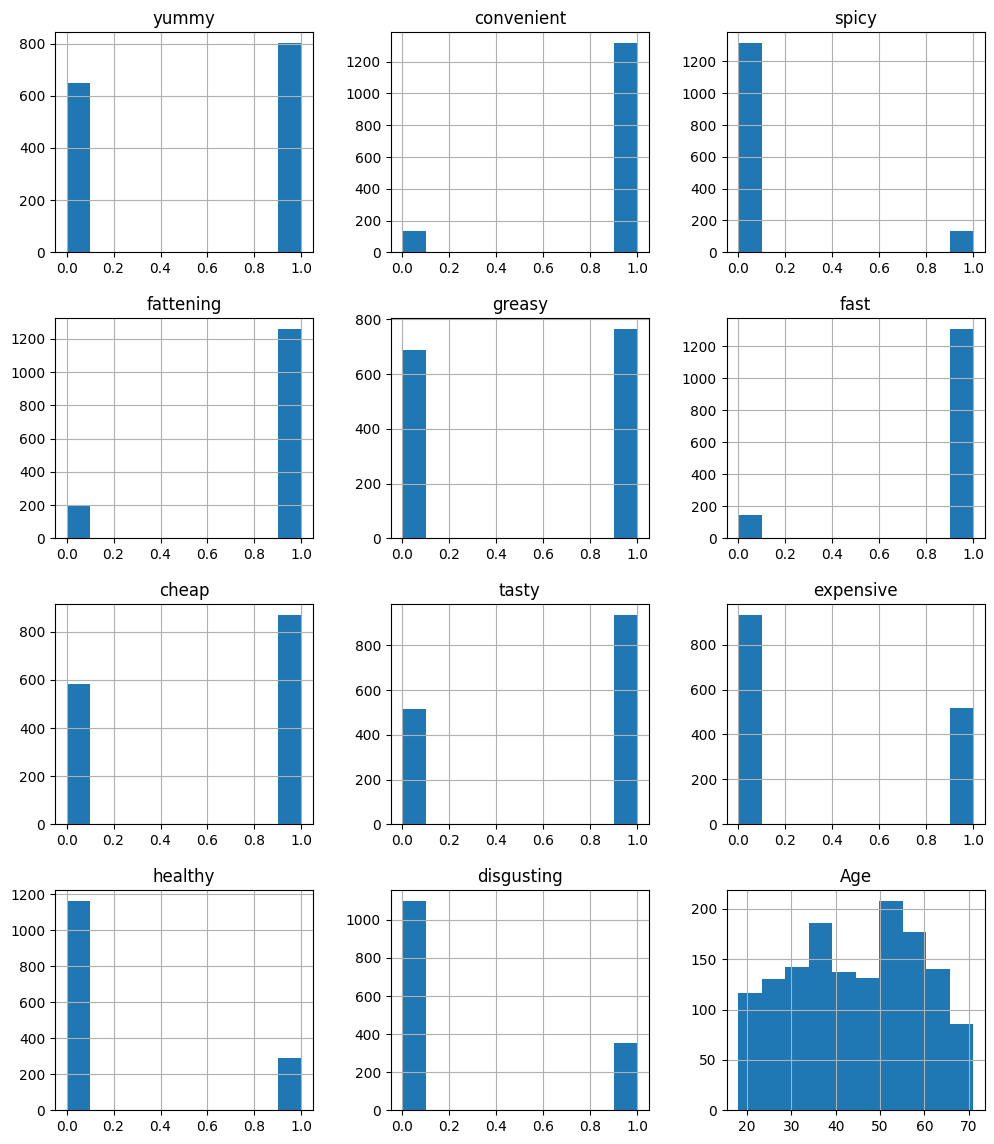

In [113]:
plt.rcParams['figure.figsize'] = (12,14)
mcdonalds.hist()
plt.show()

#Now let us implement the PCA:

In [114]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
# Get the summary information
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=['PC'+str(i+1) for i in range(MD_x.shape[1])])
# Print the summary considering the first 11 features only
print("Summary of PCA:")
print(summary_df)

Summary of PCA:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1             0.757050                0.299447               0.299447
PC2             0.607456                0.192797               0.492244
PC3             0.504619                0.133045               0.625290
PC4             0.398799                0.083096               0.708386
PC5             0.337405                0.059481               0.767866
PC6             0.310275                0.050300               0.818166
PC7             0.289697                0.043849               0.862015
PC8             0.275122                0.039548               0.901563
PC9             0.265251                0.036761               0.938323
PC10            0.248842                0.032353               0.970677
PC11            0.236903                0.029323               1.000000


#Heatmap to see the correlation between the principal components:

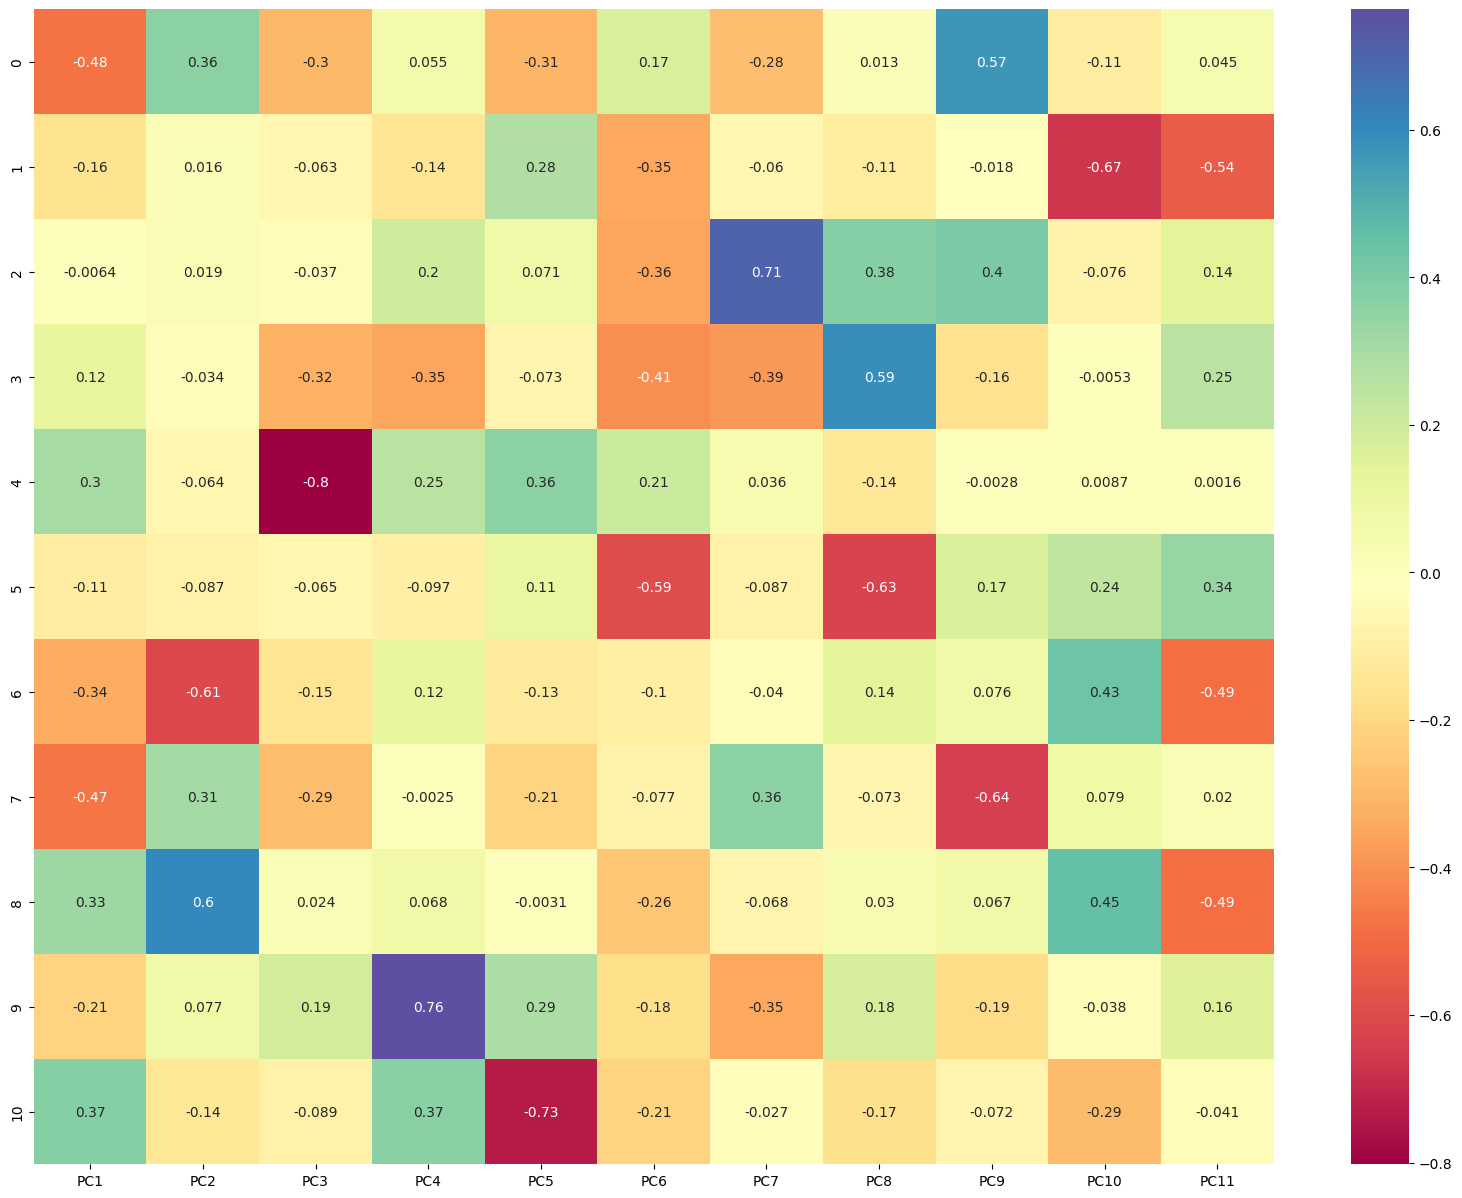

In [115]:
#Correlation matrix plot for loadings
loadings = pca.components_
loadings_mcdonalds = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_mcdonalds, annot=True, cmap='Spectral')
plt.show()


# Use the screeplot to see the proportions of the PCA components:

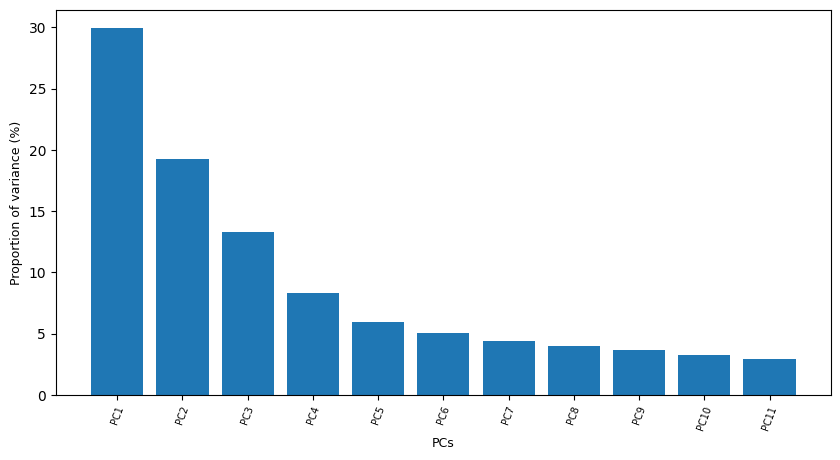

In [116]:
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

#Projection of the dataset onto the first two principal components:

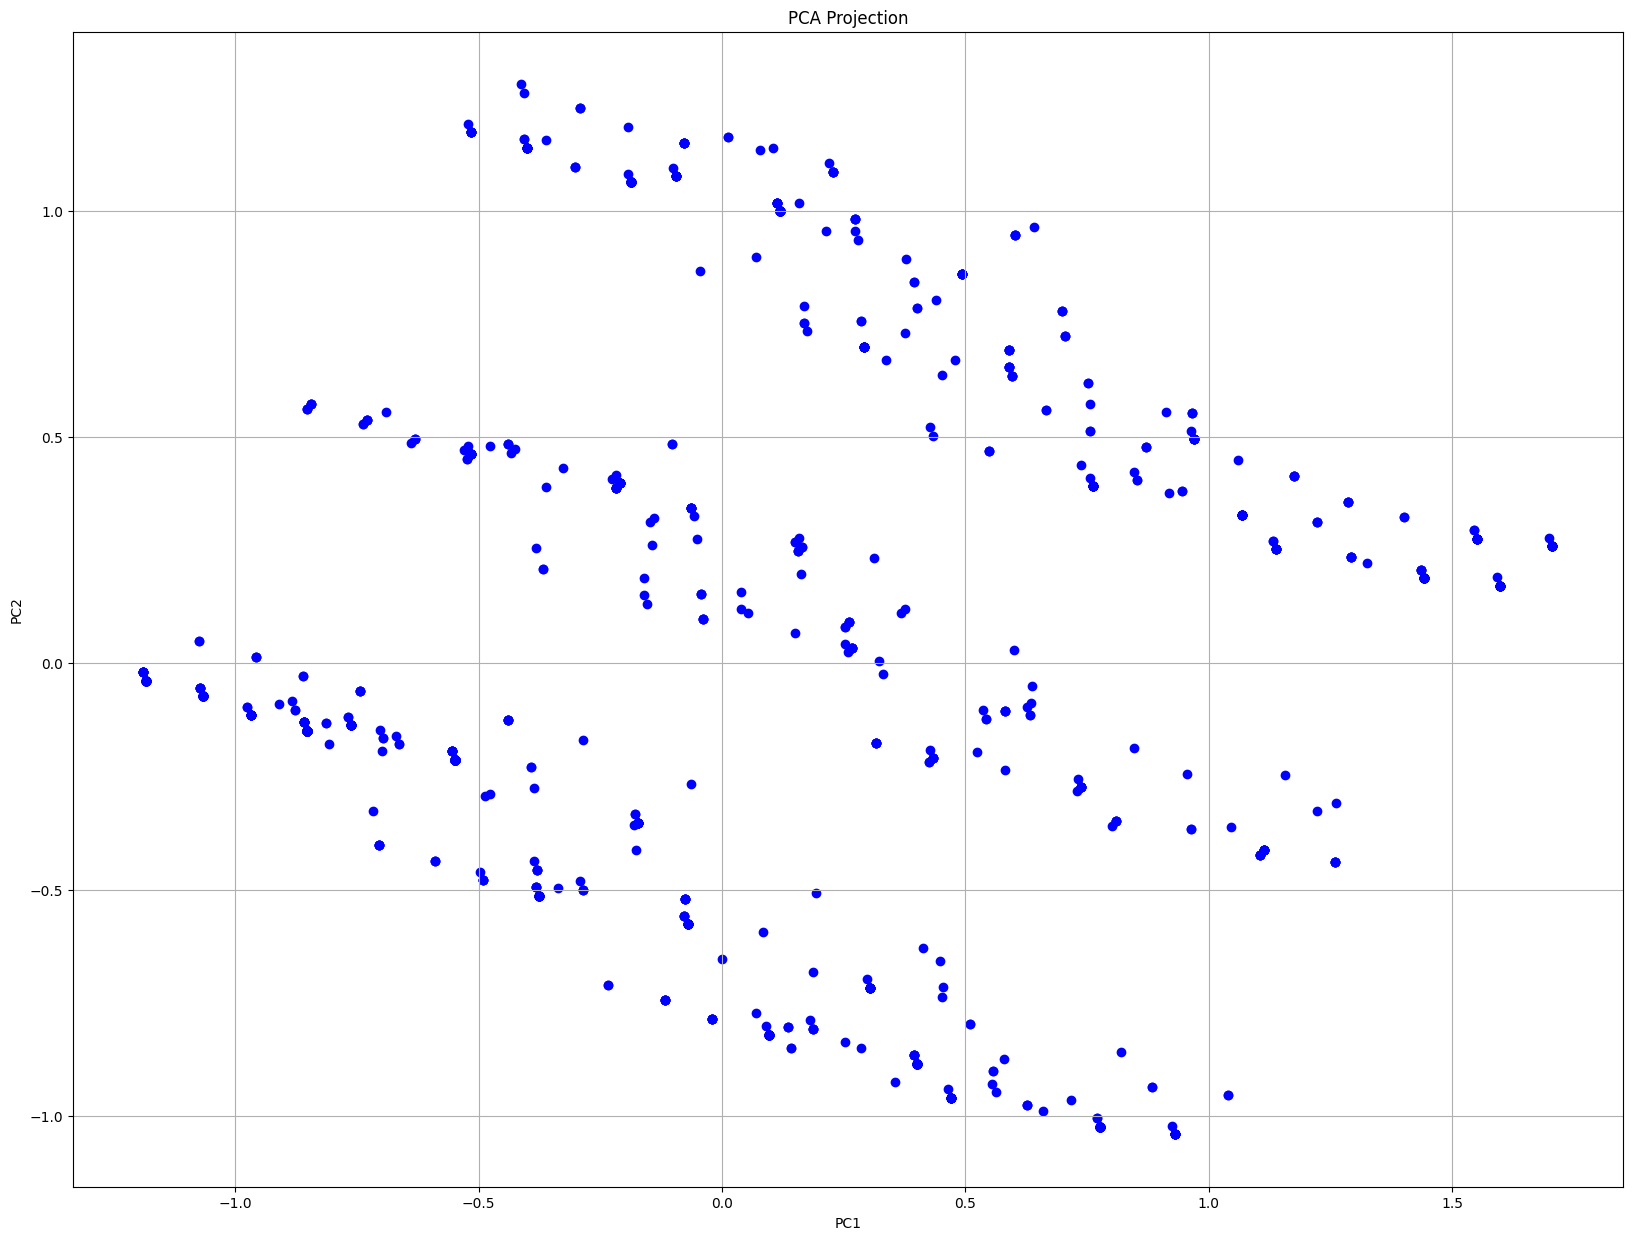

In [117]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.grid()
plt.show()

# Now we use the biplot:

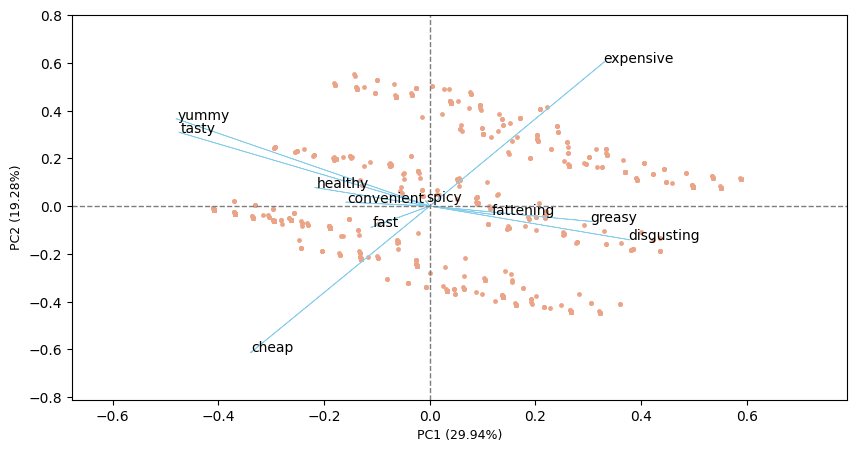

In [118]:
# get PC scores
pca_scores =MD_pca
loadings = pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=mcdonalds.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

# Implement the Elbow rule to find the appropriate number of segments:

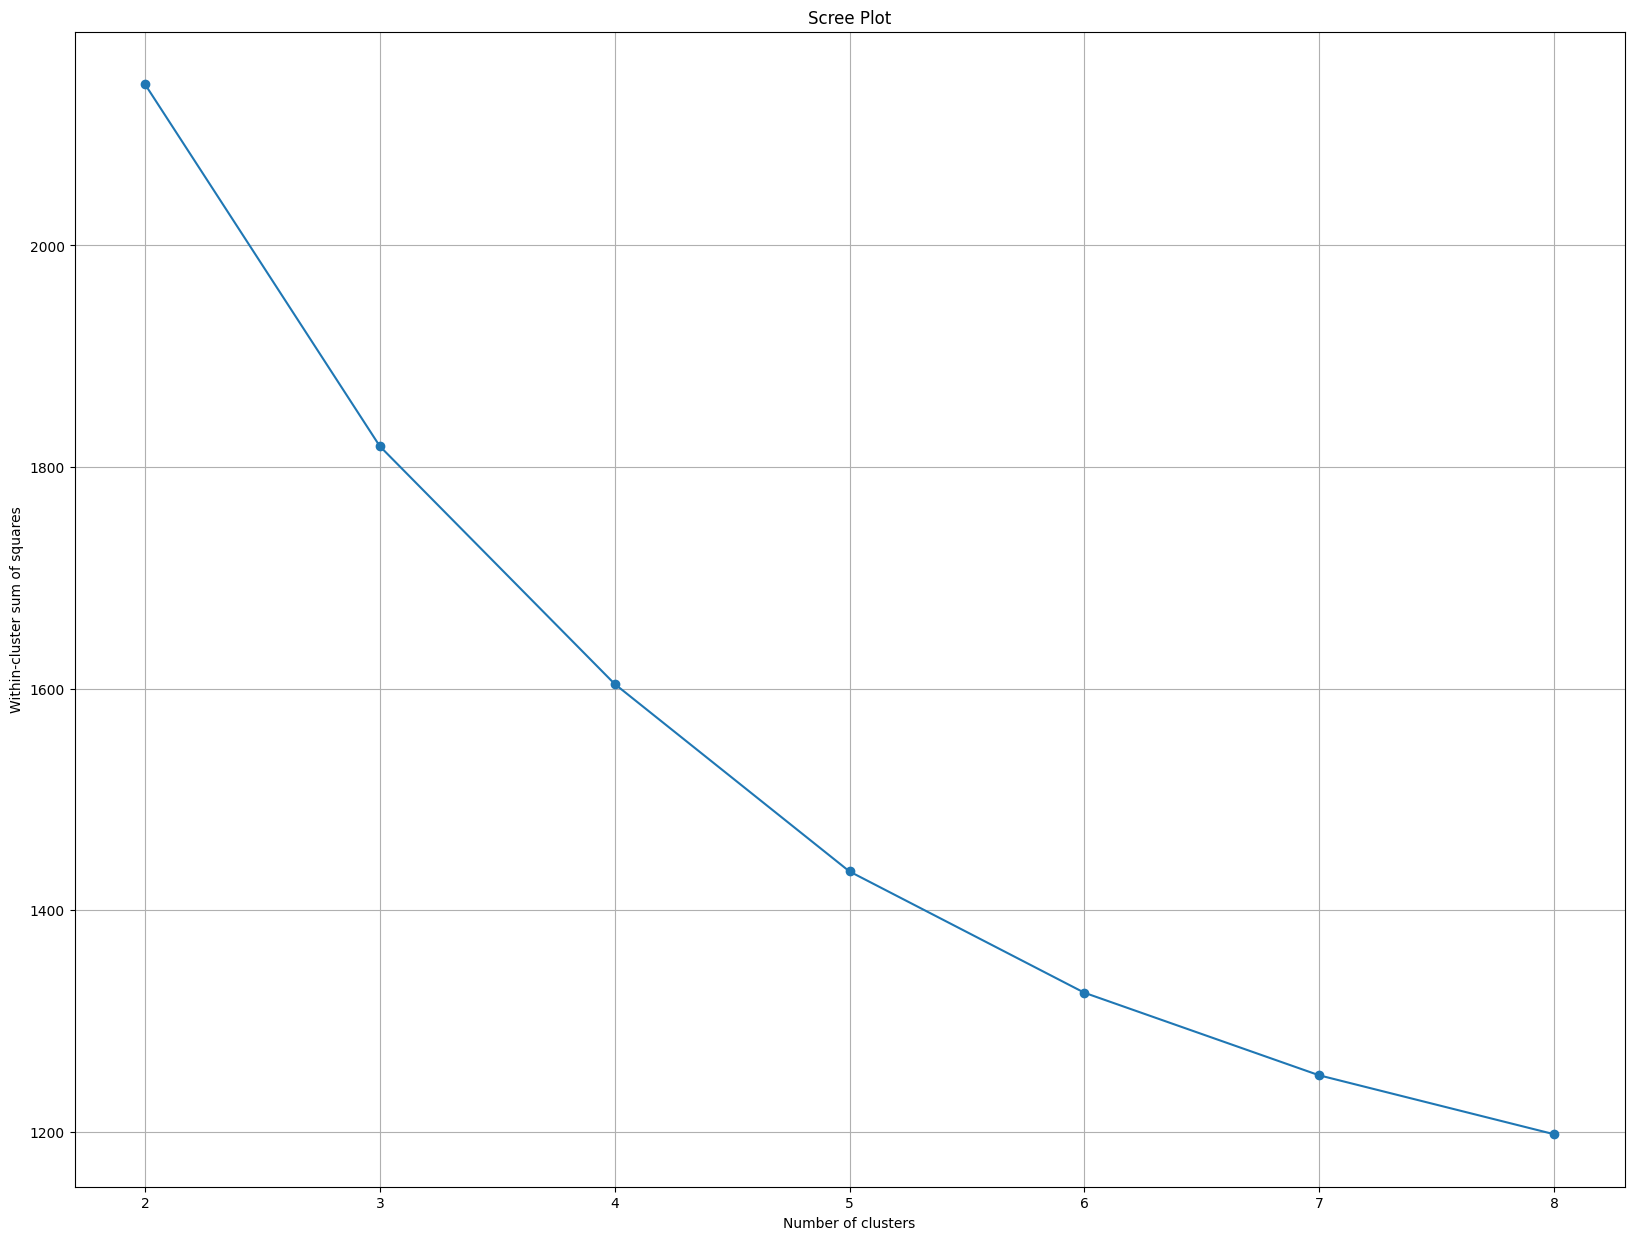

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have the MD_x matrix from the previous code

# Set the range of cluster numbers to consider
k_values = range(2, 9)

# Initialize an empty list to store the WCSS values
wcss = []

# Perform K-means clustering for each cluster number and calculate the WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(MD_x)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    wcss.append(np.sum((MD_x - cluster_centers[cluster_labels])**2))

# Plot the scree plot
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Scree Plot')
plt.grid()
plt.show()


#From above plot, the most approprite number of segments is 4.
#Now let us visualize the cluseters using KMeans Clustering.

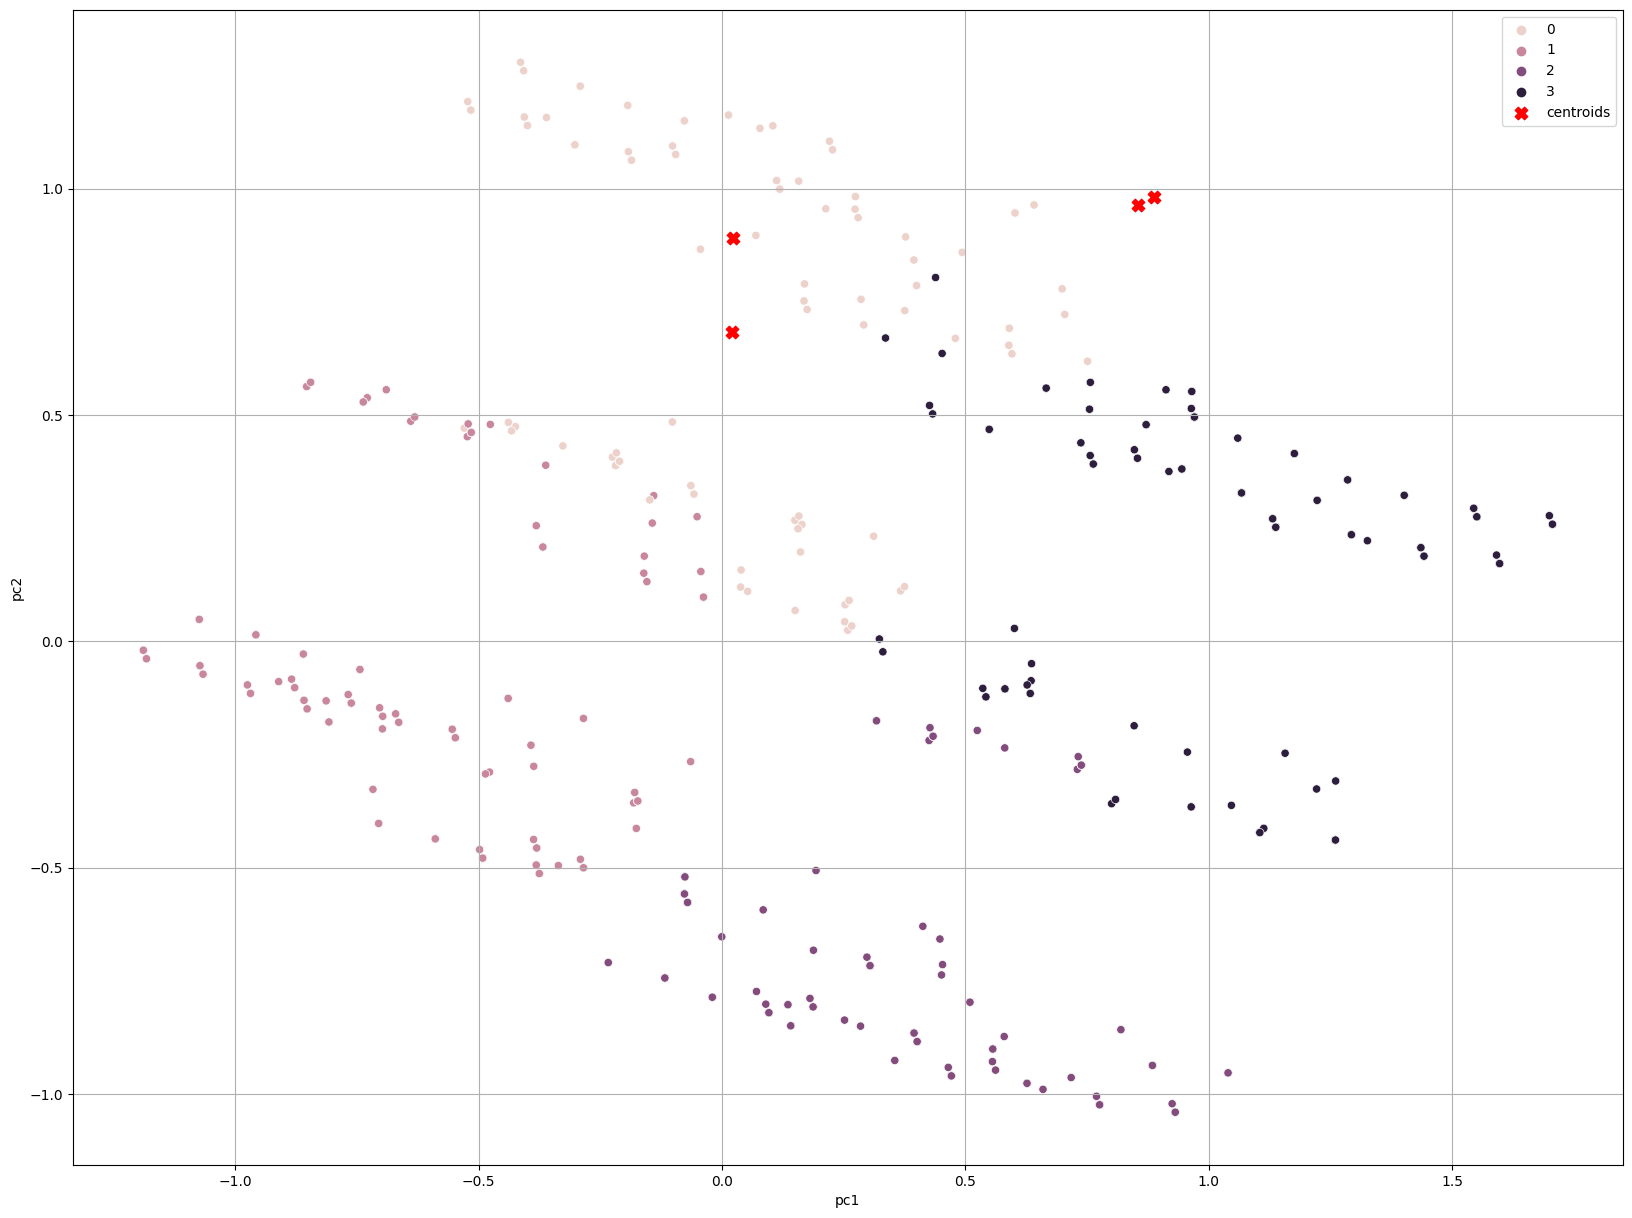

In [120]:
#Visulazing clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data =MD_pca, columns = names)
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.grid()
plt.show()

#Describing the segments:

In [121]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(kmeans.labels_,mcdonalds['Like'])
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
row_0,,,,,,,,,,,
0,42,60,66,47,44,7,6,7,3,5,36
1,65,90,143,111,99,13,6,2,4,4,43
2,31,31,12,2,0,25,28,34,36,54,51
3,14,6,8,0,0,13,19,30,28,89,39


#Mosaic Plot:

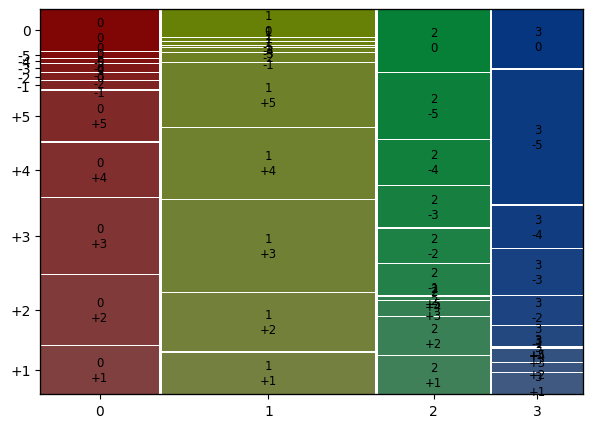

In [122]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

#Now we see the boxplot:

<Axes: xlabel='cluster_num', ylabel='Age'>

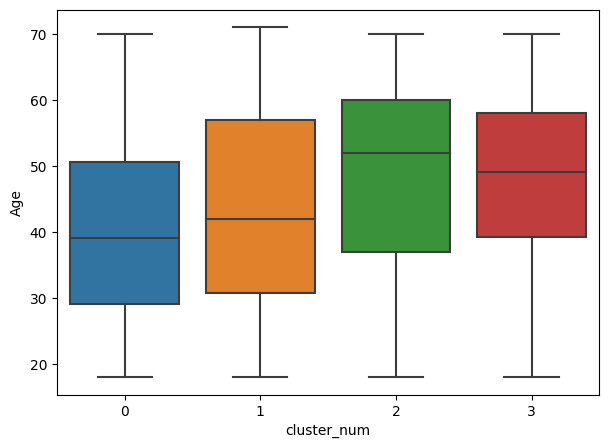

In [123]:
mcdonalds['cluster_num'] = kmeans.labels_
sns.boxplot(x="cluster_num", y="Age", data=mcdonalds)

#Select the target segment based on various parameters:

In [124]:
from sklearn.preprocessing import LabelEncoder
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [125]:
#Like
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [126]:
#Gender
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [127]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


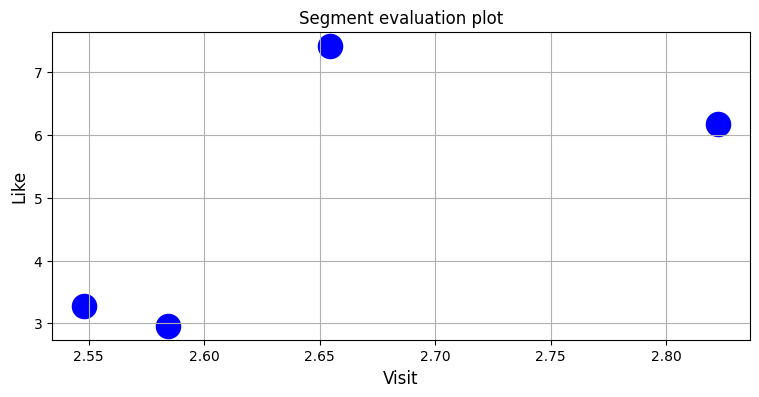

In [128]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="b")
plt.title("Segment evaluation plot")
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.grid()
plt.show()